As discussed in our lecture, we can compute the range of the projectile using the iterative method. The trajectory is given by the function $y(x)$, and we will consider $\delta\equiv 1/\tau$ as our expansion parameter (the time-scale $\tau\rightarrow\infty$ corresponds to the absence of air friction):

In [1]:
using SymPy;
x,tau,delta,g,vx0,vy0,R = symbols("x, τ, δ, g,v_{x0},v_{y0},R", real=true);
tau=1/delta;  #δ is the small parameter
y=(vy0+g*tau)/vx0*x+g*tau^2*log(1-x/(vx0*tau))  # the trajectory

     /     x*δ  \     /g         \
g*log|1 - ------|   x*|- + v_{y0}|
     \    v_{x0}/     \δ         /
----------------- + --------------
         2              v_{x0}    
        δ                         

The solution $y(R)=0$ will determine the range $R$. One can firstly Taylor expand this function (I do the expansion up to the 4th order as an illustration). Note that throughout our discussion, the phrase "expansion to #th order" is referring to the order of **the power series of $\delta$**!

In [2]:
series(y,delta,n=5).subs(x,R)

               2          3          4    2      5    3      6    4         
R*v_{y0}      R *g       R *g*δ     R *g*δ      R *g*δ      R *g*δ      / 5\
-------- - --------- - --------- - --------- - --------- - --------- + O\δ /
 v_{x0}            2           3           4           5           6        
           2*v_{x0}    3*v_{x0}    4*v_{x0}    5*v_{x0}    6*v_{x0}         

In [3]:
simplify(ans/R/g*2*vx0^2)

                          2         3  2         4  3       5  4          
2*v_{x0}*v_{y0}        2*R *δ      R *δ       2*R *δ       R *δ       / 5\
--------------- - R - -------- - --------- - --------- - --------- + O\δ /
       g              3*v_{x0}           2           3           4        
                                 2*v_{x0}    5*v_{x0}    3*v_{x0}         

After some massaging, the equation $y(R)=0$ can be rewritten as:
\begin{equation*}R=\frac{2 v_{x0} v_{y0}}{g} - \frac{2 R^{2} δ}{3 v_{x0}} - \frac{R^{3} δ^{2}}{2 v_{x0}^{2}} - \frac{2 R^{4} δ^{3}}{5 v_{x0}^{3}} - \frac{R^{5} δ^{4}}{3 v_{x0}^{4}} + O\left(δ^{5}\right).\end{equation*}
Namely, we moved the leading order term $R$ to the LHS, and everything else to the RHS. 

In [4]:
rhs=ans+R

                      2         3  2         4  3       5  4          
2*v_{x0}*v_{y0}    2*R *δ      R *δ       2*R *δ       R *δ       / 5\
--------------- - -------- - --------- - --------- - --------- + O\δ /
       g          3*v_{x0}           2           3           4        
                             2*v_{x0}    5*v_{x0}    3*v_{x0}         

In [5]:
lhs=R

R

The strategy is to plug in a lower order solution to the RHS to get a higher order solution from the LHS. As the first step, we can find the 0th order solution by ignoring all higher order terms on the RHS:

In [6]:
R0=series(rhs,delta,n=1)

2*v_{x0}*v_{y0}       
--------------- + O(δ)
       g              

As advertised, we now plug in the 0th order solution to the RHS to read out the 1st order solution from the LHS. For this purpose we only need to the RHS up to the 1st order: 

In [7]:
R1=series(rhs,delta,n=2)

                      2           
2*v_{x0}*v_{y0}    2*R *δ     / 2\
--------------- - -------- + O\δ /
       g          3*v_{x0}        

Plugging in the 0th order solution:

In [8]:
R1=R1.subs(R,R0)

                                              2        
                      /2*v_{x0}*v_{y0}       \         
                  2*δ*|--------------- + O(δ)|         
2*v_{x0}*v_{y0}       \       g              /     / 2\
--------------- - ----------------------------- + O\δ /
       g                     3*v_{x0}                  

Then the first order solution can be read out:

In [9]:
R1=simplify(R1)

                 2                            
  8*v_{x0}*v_{y0} *δ   2*v_{x0}*v_{y0}    / 2\
- ------------------ + --------------- + O\δ /
            2                 g               
         3*g                                  

Next, one can plug in the 1st order solution to the RHS in order to find the 2nd order solution. For this purpose we only need the RHS up to the second order:

In [10]:
R2=series(rhs,delta,n=3)

                      2         3  2          
2*v_{x0}*v_{y0}    2*R *δ      R *δ       / 3\
--------------- - -------- - --------- + O\δ /
       g          3*v_{x0}           2        
                             2*v_{x0}         

Plugging in 1st order solution to the RHS:

In [11]:
R2=R2.subs(R,R1)

                                                                     3        
                     /                 2                            \        /
                   2 |  8*v_{x0}*v_{y0} *δ   2*v_{x0}*v_{y0}    / 2\|        |
                  δ *|- ------------------ + --------------- + O\δ /|    2*δ*|
                     |            2                 g               |        |
2*v_{x0}*v_{y0}      \         3*g                                  /        \
--------------- - ---------------------------------------------------- - -----
       g                                       2                              
                                       2*v_{x0}                               

                                               2        
                 2                            \         
  8*v_{x0}*v_{y0} *δ   2*v_{x0}*v_{y0}    / 2\|         
- ------------------ + --------------- + O\δ /|         
            2                 g               |         
   

We find the second order solution:

In [12]:
R2=simplify(R2)

                3  2                  2                            
28*v_{x0}*v_{y0} *δ    8*v_{x0}*v_{y0} *δ   2*v_{x0}*v_{y0}    / 3\
-------------------- - ------------------ + --------------- + O\δ /
           3                     2                 g               
        9*g                   3*g                                  

One can keep doing this order by order, but we will stop at the 3rd order as below:

In [13]:
R3=series(rhs,delta,n=4)

                      2         3  2         4  3         
2*v_{x0}*v_{y0}    2*R *δ      R *δ       2*R *δ      / 4\
--------------- - -------- - --------- - --------- + O\δ /
       g          3*v_{x0}           2           3        
                             2*v_{x0}    5*v_{x0}         

In [14]:
R3=R3.subs(R,R2)

                                                                              
                       /                3  2                  2               
                     3 |28*v_{x0}*v_{y0} *δ    8*v_{x0}*v_{y0} *δ   2*v_{x0}*v
                  2*δ *|-------------------- - ------------------ + ----------
                       |           3                     2                 g  
2*v_{x0}*v_{y0}        \        9*g                   3*g                     
--------------- - ------------------------------------------------------------
       g                                                   3                  
                                                   5*v_{x0}                   

              4                                                               
             \       /                3  2                  2                 
_{y0}    / 3\|     2 |28*v_{x0}*v_{y0} *δ    8*v_{x0}*v_{y0} *δ   2*v_{x0}*v_{
----- + O\δ /|    δ *|-------------------- - ------

In [15]:
R3=simplify(R3)

                   4  3                   3  2                  2             
  464*v_{x0}*v_{y0} *δ    28*v_{x0}*v_{y0} *δ    8*v_{x0}*v_{y0} *δ   2*v_{x0}
- --------------------- + -------------------- - ------------------ + --------
               4                     3                     2                 g
          135*g                   9*g                   3*g                   

               
*v_{y0}    / 4\
------- + O\δ /
               
               

Now it is time to benchmark our approximated solution $R3$ with the exact solution $Rexact$ found below:

In [16]:
Rexact=solve(y,x)[1]

       /   /                      v_{y0}*δ\               \
       |   |                 -1 - --------|               |
       |   |                         g    |               |
       |   |(-g - v_{y0}*δ)*e             |               |
v_{x0}*|g*W|------------------------------| + g + v_{y0}*δ|
       \   \              g               /               /
-----------------------------------------------------------
                      δ*(g + v_{y0}*δ)                     

As expected, the exact solution involves a special function LambertW.

In [17]:
print(Rexact.subs([(vx0,5),(vy0,5),(g,9.8)]))

5*(5*δ + 9.8*LambertW(0.102040816326531*(-5*δ - 9.8)*exp(-0.510204081632653*δ - 1)) + 9.8)/(δ*(5*δ + 9.8))

In [18]:
using LambertW
Rexactfunc(δ)=5*(5*δ + 9.8*lambertw(0.102040816326531*(-5*δ - 9.8)*exp(-0.510204081632653*δ - 1)) + 9.8)/(δ*(5*δ + 9.8))

Rexactfunc (generic function with 1 method)

In [19]:
R3func=(R3.removeO().subs([(vx0,5),(vy0,5),(g,9.8)]))

                   3                     2                                    
- 1.1644743613809*δ  + 2.06593813424301*δ  - 3.47077606552825*δ + 5.1020408163

    
2653

We plot the range as a function of $1/τ$ below, for the initial velocity $\vec v_{0}=(5,5)$m/s. You can see that the exact solution is well approximated by the third order polynomial $R3$, at least when $1/τ$ is small.

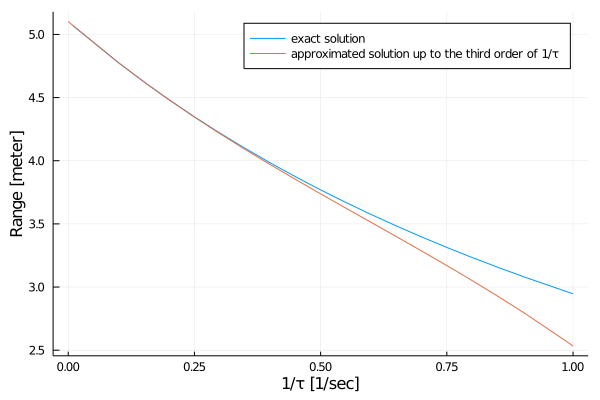

In [20]:
using Plots;
plot(Rexactfunc,0,1,label="exact solution",xlabel="1/τ [1/sec]",ylabel="Range [meter]")
plot!(R3func,0,1,label="approximated solution up to the third order of 1/τ")